In [2]:
# importando bibliotecas adicionais
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lombscargle packages
from astropy.timeseries import LombScargle
from gatspy.periodic import LombScargleFast

In [3]:
# Iniciando com a rotina criada para ler o arquivo e converter para dataframe:
%run ../rotinas/convert_extension_Dframe.py

In [4]:
filename = 'foreshockmain.DAT'
df = convertDframe(filename)
df.head()

,Time,Br,Bt,Bn,Bo
1,27.56823,-0.02113,0.24031,1E-3,0.24131
2,27.56829,-0.02597,0.247,-0.00122,0.24824
3,27.56834,-0.03401,0.24221,-0.0144,0.24562
4,27.5684,-0.02735,0.23381,0.00431,0.23581
5,27.56846,-0.03126,0.2419,-0.00543,0.24453


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 1 to 4701
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    4701 non-null   object
 1   Br      4701 non-null   object
 2   Bt      4701 non-null   object
 3   Bn      4701 non-null   object
 4   Bo      4701 non-null   object
dtypes: object(5)
memory usage: 183.8+ KB


In [6]:
df = df.astype(float)
df.dtypes

Time    float64
Br      float64
Bt      float64
Bn      float64
Bo      float64
dtype: object

In [7]:
df.describe()

,Time,Br,Bt,Bn,Bo
count,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000
mean,27.704225,-0.038937,0.219895,-0.061006,0.242422
std,0.078542,0.042383,0.030508,0.056475,0.028966
min,27.568230,-0.202360,0.102990,-0.227920,0.146580
25%,27.636230,-0.059610,0.203660,-0.104550,0.225000
50%,27.704220,-0.040980,0.220000,-0.057650,0.240830
75%,27.772220,-0.019770,0.237100,-0.019930,0.260200
max,27.840220,0.200650,0.405720,0.105750,0.415430


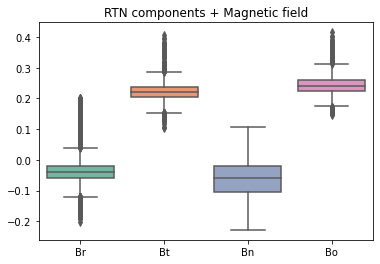

In [8]:
fig1, ax1 = plt.subplots()
ax1.set_title('RTN components + Magnetic field')
df.drop(['Time'], axis = 1, inplace = True)
ax1 = sns.boxplot(data=df, orient = 'v', palette = 'Set2')

<AxesSubplot:>

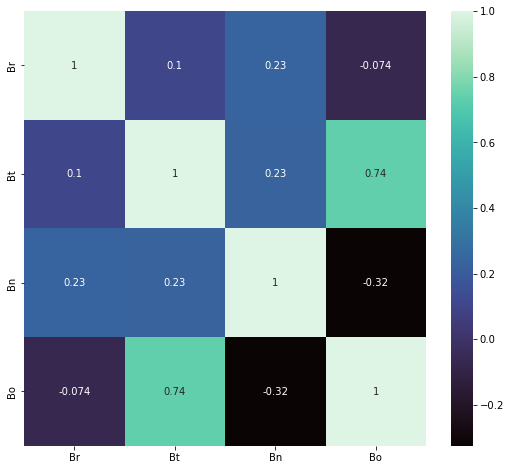

In [9]:
# HeatMap
matrix = df.corr()
f, ax = plt.subplots(figsize=(9,8))
sns.heatmap(matrix, cmap='mako', annot=True)

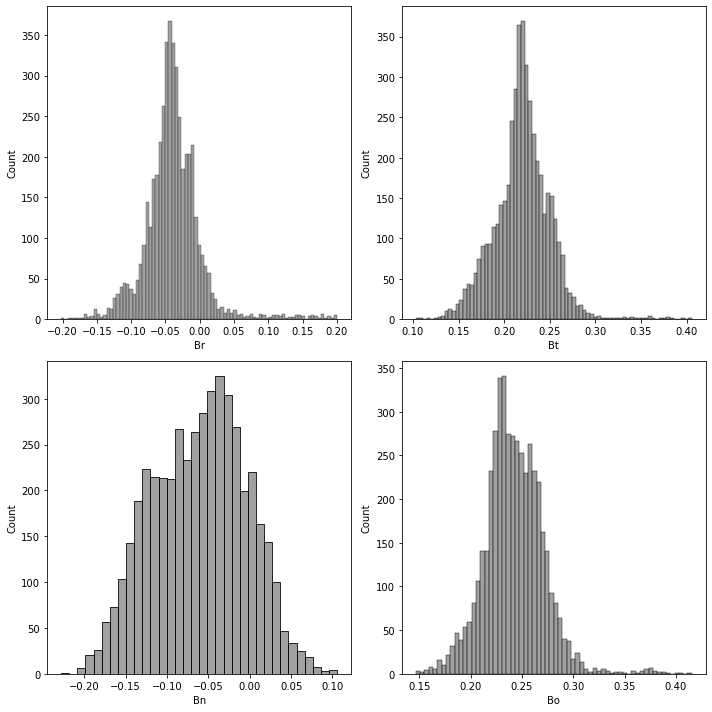

In [10]:
# Distribution
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

mag = [df['Br'], df['Bt'], df['Bn'], df['Bo']]

fig = plt.figure(figsize=(10,10))
for i in mag:
    plt.subplot(a, b, c)
    sns.histplot(i, color='grey')
    plt.tight_layout()
    c = c + 1
plt.show()

# Lomb-Scargle Periodogram

In [11]:
# lendo o arquivo desejado:
filename = 'foreshockmain.DAT'
df = convertDframe(filename)
df.head()

,Time,Br,Bt,Bn,Bo
1,27.56823,-0.02113,0.24031,1E-3,0.24131
2,27.56829,-0.02597,0.247,-0.00122,0.24824
3,27.56834,-0.03401,0.24221,-0.0144,0.24562
4,27.5684,-0.02735,0.23381,0.00431,0.23581
5,27.56846,-0.03126,0.2419,-0.00543,0.24453


In [12]:
df.dtypes

Time    object
Br      object
Bt      object
Bn      object
Bo      object
dtype: object

In [13]:
df = df.astype(float)
df.dtypes

Time    float64
Br      float64
Bt      float64
Bn      float64
Bo      float64
dtype: object

In [14]:
min = min(df['Time'])
max = max(df['Time'])
print('Period range: ', max - min)

Period range:  0.27198999999999884


In [15]:
t = df['Time']
t.values

array([27.56823, 27.56829, 27.56834, ..., 27.8401 , 27.84016, 27.84022])

In [16]:
t = df['Time']%1
t.values

array([0.56823, 0.56829, 0.56834, ..., 0.8401 , 0.84016, 0.84022])

In [17]:
tmin = t.min()
tmax = t.max()
print('Range: ', tmax-tmin)

Range:  0.27198999999999884


In [21]:
t = t*24.
t.values

array([13.63752, 13.63896, 13.64016, ..., 20.1624 , 20.16384, 20.16528])

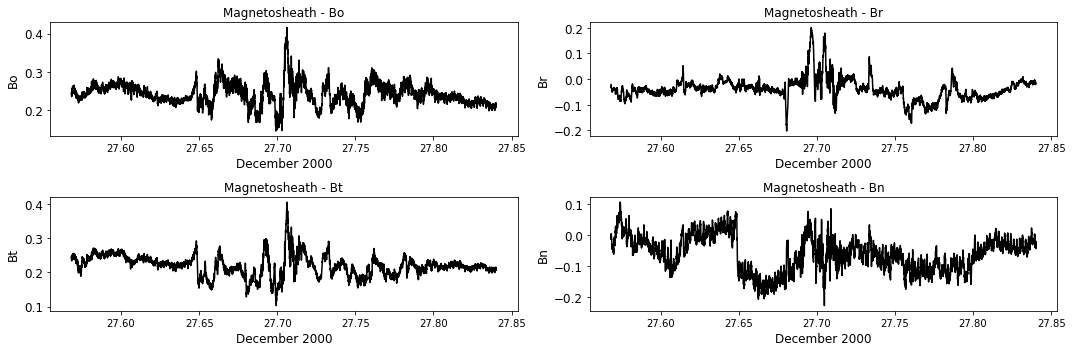

In [18]:
# magnetic components
mag = [df['Bo'],df['Br'],df['Bt'],df['Bn']]

# Plot numerical data
a = 2 # number of rows
b = 2 # number of columns
c = 1 # initialize plot counter

fig = plt.figure(figsize = (15,5))

for i in mag:
    plt.subplot(a,b,c)
    plt.plot(df['Time'], i, color = 'black')
    plt.title('Magnetosheath - ' + i.name)
    plt.xlabel('December 2000', fontsize = 12)
    plt.ylabel(i.name, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.tight_layout()
    c = c + 1

plt.show()

In [19]:
%run ../rotinas/analysis_lombscargle.py

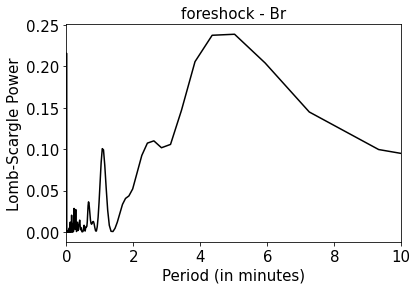

In [22]:
y = df['Br']
plot_lombscargle(filename, t, y)

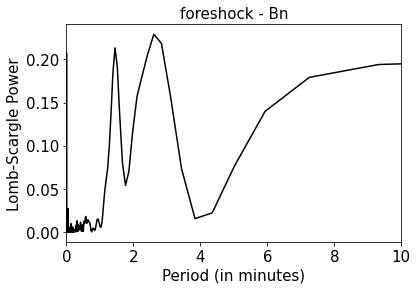

In [23]:
y = df['Bn']
plot_lombscargle(filename, t, y)

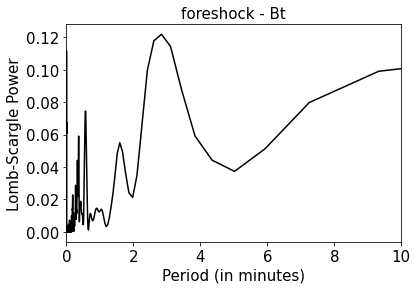

In [24]:
y = df['Bt']
plot_lombscargle(filename, t, y)

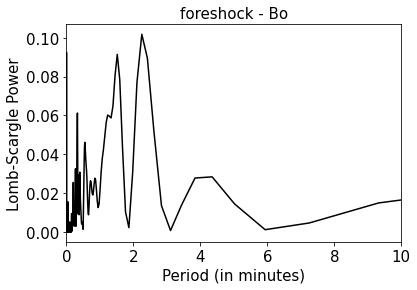

In [25]:
y = df['Bo']
plot_lombscargle(filename, t, y)

In [ ]:
t = df['Time']%1
t = t*24
t.values

In [ ]:
%run ../rotinas/analysis_lombscargle.py

In [ ]:
y = df['Bo']
plot_lombscargle(filename, t, y)

In [ ]:
t = df['Time']%1
t = t*24*60
t.values

Finding optimal frequency:
 - Estimated peak width = 0.963
 - Using 5 steps per peak; omega_step = 0.193
 - User-specified period range:  0.05 to 0.1
 - Computing periods at 328 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [0.09824809 0.09351341 0.09673966 0.08302968 0.09074198]
Maximum power:  0.10182740976643295
Best frequency:  0.4442565290390597


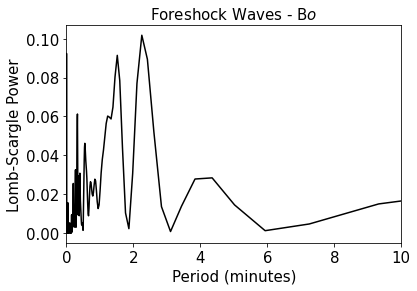

In [32]:
y = df['Bo']

model = LombScargleFast().fit(t, y)
model.optimizer.period_range=(0.05,0.1) 
period = model.find_best_periods()
print('Periods = {}'.format(period))
    
ls = LombScargle(t, y)
frequency, power = ls.autopower()
print('Maximum power: ', power.max())  
best_frequency = frequency[np.argmax(power)] 
print('Best frequency: ', best_frequency)

#fig = plt.figure(figsize = (20,10))
plt.title('Foreshock Waves - B${o}$', fontsize = 15)
plt.xlabel('Period (minutes)', fontsize = 15)
plt.ylabel('Lomb-Scargle Power', fontsize = 15)
plt.xlim(0,10)
#plt.ylim(min(power), 0.22)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(1./frequency, power, color = 'black', label=y.name)

plt.show()